# Tensorflow Wine Example

Libraries and data

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

wine = pd.read_csv("../datafiles/winequality-red.csv", sep = ";")

tf.random.set_seed(1234)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


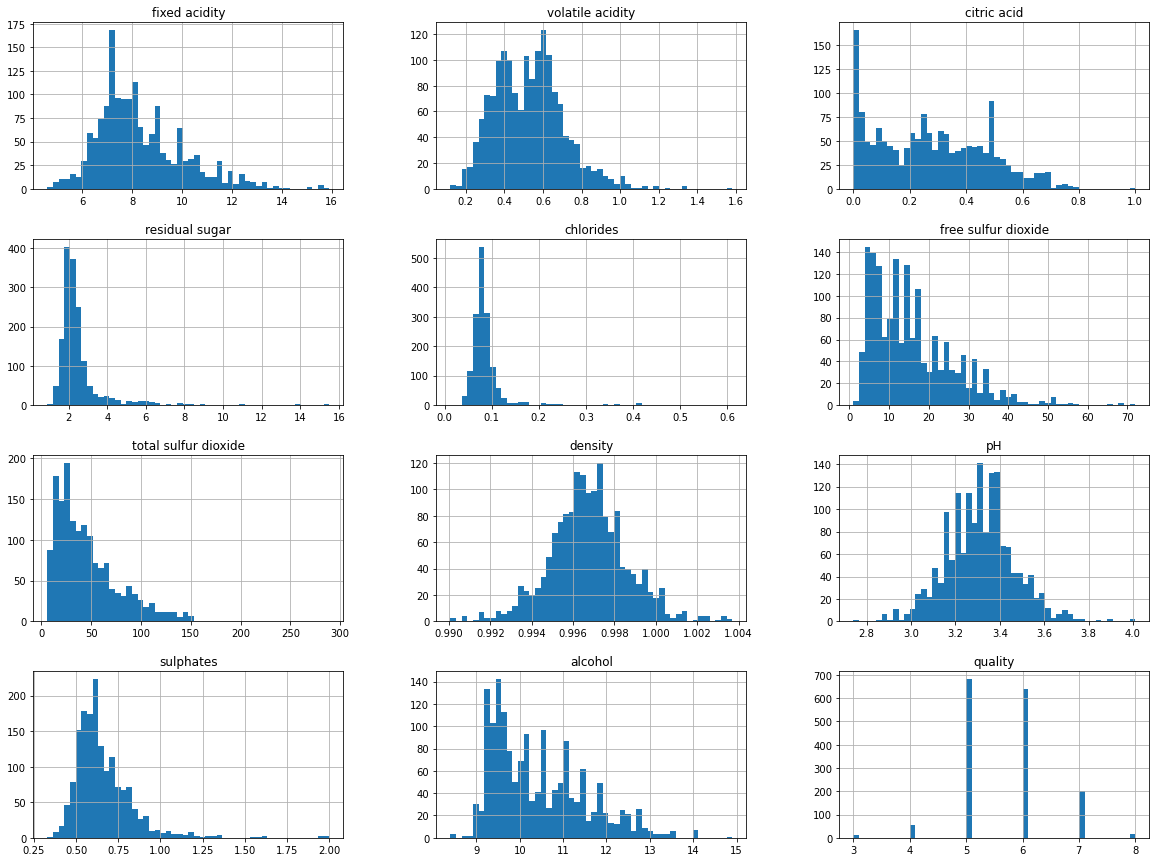

In [5]:
## %matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
plt.show()

## Cross-validation

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wine, test_size=0.2, random_state=42)

In [7]:
X_train = train.drop('quality', axis=1).values
y_train = train['quality'].values
print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


In [8]:
X_test = test.drop('quality', axis=1).values
y_test = test['quality'].values
print(X_test.shape)
print(y_test.shape)

(320, 11)
(320,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

## Random forest (shallow learner)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
print('Root mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred, squared = True))

Root mean squared error: 0.31


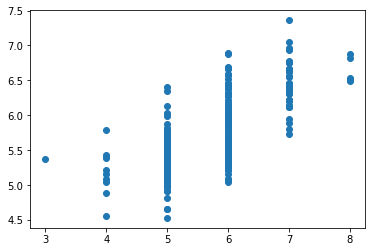

In [14]:
plt.scatter(y_test, y_test_pred)
plt.show()

## Tensorflow (deep learner)

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [14]:
X_train.shape

(1279, 11)

In [17]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(11,)),
  layers.Dense(1, activation='linear')
])

In [34]:
y_train

array([6, 6, 6, ..., 5, 7, 6])

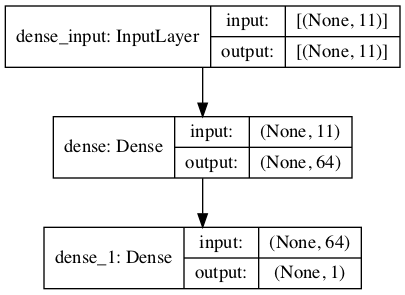

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


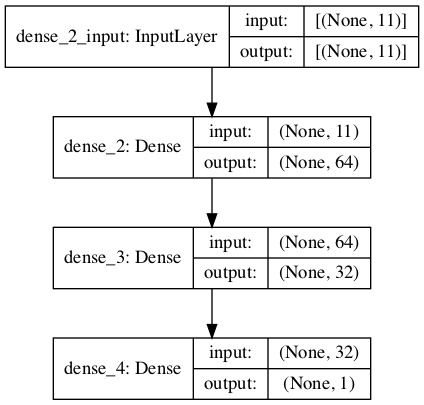

In [21]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(11,)),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='linear')
])
plot_model(model, show_shapes = True)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


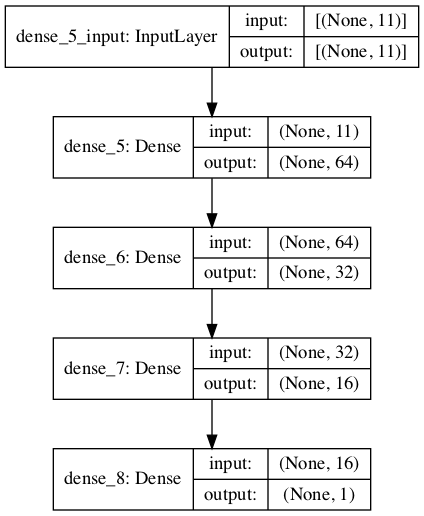

In [23]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(11,)),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='linear')
])
plot_model(model, show_shapes = True)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras import optimizers
optimizer = optimizers.RMSprop()

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [26]:
hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test),
                 epochs=125, batch_size=16, verbose=1)

2023-04-17 12:20:58.799872: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-17 12:20:58.805437: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/125
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
69/80 [========================>.....] - ETA: 0s - loss: 18.6188 - mae: 3.9596 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x142f07820> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

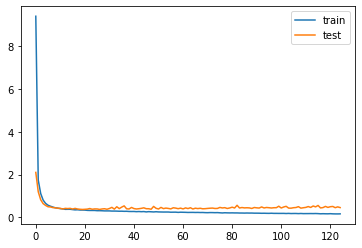

In [27]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

Change hyper-parameters

In [28]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(11,)),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='linear')
])
optimizer = optimizers.RMSprop(lr = 1e-4)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [29]:
hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test),
                 epochs=50, batch_size=16, verbose=1)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
80/80 [==============================] - ETA: 0s - loss: 33.2388 - mae: 5.7036 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x143329c10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

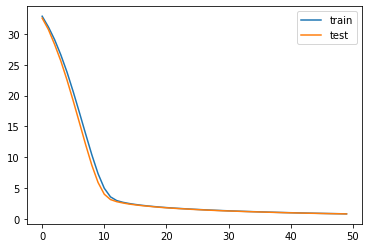

In [30]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)
print('MSE loss: %.4f'
      % test_mse_score)
print('MAE: %.4f'
      % test_mae_score)

MSE loss: 0.7994
MAE: 0.7097


In [32]:
y_test_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


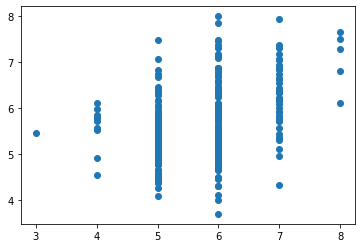

In [33]:
plt.scatter(y_test, y_test_pred)
plt.show()